<a href="https://colab.research.google.com/github/GauravPatel89/EVA-Track3-Assignments/blob/master/Session6/Assignment6A.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Import neceesary modules

from keras import backend as K
import time
import matplotlib.pyplot as plt
import numpy as np
% matplotlib inline
np.random.seed(2017) 
from keras.models import Sequential
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.layers import Activation, Flatten, Dense, Dropout
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils

Using TensorFlow backend.


In [0]:
# Import and load cifar10 dataset

from keras.datasets import cifar10
(train_features, train_labels), (test_features, test_labels) = cifar10.load_data()
num_train, img_channels, img_rows, img_cols =  train_features.shape
num_test, _, _, _ =  test_features.shape
num_classes = len(np.unique(train_labels))

170500096/170498071 [==============================] - 3s 0us/step


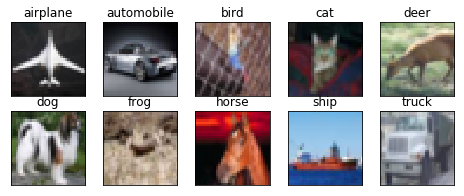

In [0]:
# Display randomly selected examples from each of the classes

class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']
fig = plt.figure(figsize=(8,3))
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(train_labels[:]==i)[0]
    features_idx = train_features[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    im = features_idx[img_num]
    ax.set_title(class_names[i])
    plt.imshow(im)
plt.show()

In [0]:
# Define a function to plot training and test accuracies and losses during the training

def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))   # define a plot with 1 row and 2 columns of subplots
    
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
    axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss') 
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

In [0]:
# define a function to calculate accuracy based on passed model, test data and test labels
def accuracy(test_x, test_y, model):
    result = model.predict(test_x)
    predicted_class = np.argmax(result, axis=1)
    true_class = np.argmax(test_y, axis=1)
    num_correct = np.sum(predicted_class == true_class) 
    accuracy = float(num_correct)/result.shape[0]
    return (accuracy * 100)

In [0]:
# Stadandardize the data by converting it to float32 and dividing by max pixel value 255
train_features = train_features.astype('float32')/255
test_features = test_features.astype('float32')/255

# convert class labels to binary class labels in one hot encoding
train_labels = np_utils.to_categorical(train_labels, num_classes)
test_labels = np_utils.to_categorical(test_labels, num_classes)

# **Base Model**

Following is the baseline model shared in EVA session 6.

In [0]:
# Define the model
model = Sequential()
model.add(Convolution2D(48, 3, 3, border_mode='same', input_shape=(32, 32, 3)))
model.add(Activation('relu'))
model.add(Convolution2D(48, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Convolution2D(96, 3, 3, border_mode='same'))
model.add(Activation('relu'))
model.add(Convolution2D(96, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Convolution2D(192, 3, 3, border_mode='same'))
model.add(Activation('relu'))
model.add(Convolution2D(192, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])







Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (3, 3), input_shape=(32, 32, 3..., padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (3, 3))`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(96, (3, 3), padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(96, (3, 3))`
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(192, (3, 3), padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: UserWarning: Update your `Conv2D` 

In [0]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 48)        1344      
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 48)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 48)        20784     
_________________________________________________________________
activation_2 (Activation)    (None, 30, 30, 48)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 48)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 15, 15, 48)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 96)       

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, steps_per_epoch=390, epochs=100)`
  if sys.path[0] == '':


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Epoch 1/100





390/390 [==============================] - 29s 74ms/step - loss: 1.8513 - acc: 0.2912 - val_loss: 1.4269 - val_acc: 0.4701
Epoch 2/100
390/390 [==============================] - 20s 51ms/step - loss: 1.3490 - acc: 0.5118 - val_loss: 1.1592 - val_acc: 0.5818
Epoch 3/100
390/390 [==============================] - 20s 51ms/step - loss: 1.1246 - acc: 0.6018 - val_loss: 0.9576 - val_acc: 0.6628
Epoch 4/100
390/390 [==============================] - 20s 51ms/step - loss: 0.9834 - acc: 0.6582 - val_loss: 0.8703 - val_acc: 0.6980
Epoch 5/100
390/390 [==============================] - 20s 52ms/step - loss: 0.8713 - acc: 0.6992 - val_loss: 0.8159 - val_acc: 0.7184
Epoch 6/100
390/390 [==============================] - 20s 51ms/step - loss: 0.8045 - acc: 0.7264 - val_loss: 0.7409 - val_acc: 0.7491
Epoch 7/100
390/390 [==============================] - 20s 51ms/step - loss: 0.7354 - ac

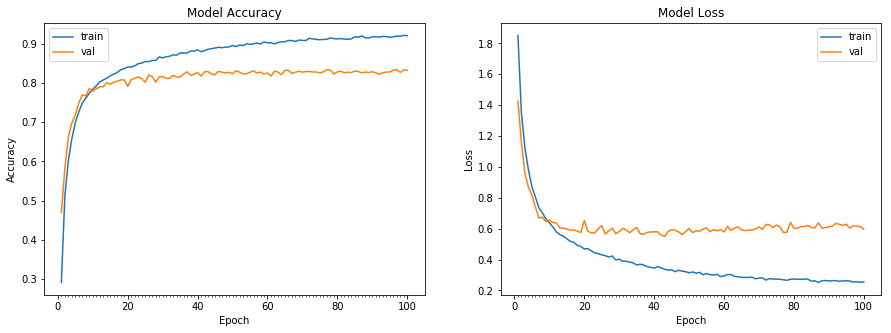

Accuracy on test data is: 83.23


In [0]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False)


# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 100, 
                                 validation_data = (test_features, test_labels), verbose=1)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

## Observations
- Model uses 1,172,410 parameters
- Best accuracy obtained is 83.43 %


# **Modified Model**
- Throughout the model padding is set to be 'same' so output has same spatial dimension as input this allows us to create models with more number of layers
- Model shown below is final model after following step wise approach of introducing enhancements like BatchNormalization, DropOut, Regularization etc one at a time


In [0]:
# Define the model
model = Sequential()

model.add(Convolution2D(32, (3, 3), padding='same', input_shape=(32, 32, 3))) #  RF=3x3    o/p dim=32x32X32   kernel=3x3x3x32
model.add(BatchNormalization())      # Batch Normalization
model.add(Activation('relu'))        # Relu activation
model.add(Dropout(0.1))              # 10% DropOut

model.add(Convolution2D(64, (3, 3), padding='same'))                          #  RF=5x5    o/p dim=32x32x64   kernel=3x3x32x64
model.add(BatchNormalization())      # Batch Normalization
model.add(Activation('relu'))        # Relu activation
model.add(Dropout(0.1))              # 10% DropOut

model.add(Convolution2D(128, (3, 3), padding='same'))                         #  RF=7x7    o/p dim=32x32x128   kernel=3x3x64x128
model.add(BatchNormalization())      # Batch Normalization
model.add(Activation('relu'))        # Relu activation
model.add(Dropout(0.15))             # 15% DropOut

model.add(MaxPooling2D(pool_size=(2, 2)))        # MaxPooling                 #  RF=14x14  o/p dim=16x16x128     
model.add(Convolution2D(32, 1, padding='same'))  # 1x1 Conv                   #  RF=14x14  o/p dim=16x16x32    kernel=1x1x128x32
model.add(Activation('relu'))        # Relu activation
model.add(Dropout(0.15))             # 15% DropOut

model.add(Convolution2D(64, (3, 3), padding='same'))                          #  RF=16x16  o/p dim=16x16x64    kernel=3x3x32x64        
model.add(BatchNormalization())      # Batch Normalization
model.add(Activation('relu'))        # Relu activation
model.add(Dropout(0.20))             # 20% DropOut

model.add(Convolution2D(128, (3, 3), padding='same'))                         #  RF=18x18  o/p dim=16x16x128   kernel=3x3x64x128
model.add(BatchNormalization())      # Batch Normalization
model.add(Activation('relu'))        # Relu activation
model.add(Dropout(0.20))             # 20% DropOut

model.add(MaxPooling2D(pool_size=(2, 2)))        # MaxPooling                 #  RF=36x36  o/p dim=8x8x128      
model.add(Convolution2D(32, 1, padding='same'))  # 1x1 Conv                   #  RF=36x36  o/p dim=8x8x32      kernel=1x1x128x32    
model.add(Activation('relu'))        # Relu activation
model.add(Dropout(0.25))             # 25% DropOut

model.add(Convolution2D(64, (3, 3), padding='same'))                          #  RF=38x38  o/p dim=8x8x64      kernel=3x3x32x64 
model.add(BatchNormalization())      # Batch Normalization
model.add(Activation('relu'))        # Relu activation
model.add(Dropout(0.30))             # 30% DropOut

model.add(Convolution2D(128, (3, 3), padding='same'))                         #  RF=40x40  o/p dim=8x8x128     kernel=3x3x64x128 
model.add(BatchNormalization())      # Batch Normalization
model.add(Activation('relu'))        # Relu activation
model.add(Dropout(0.30))             # 30% DropOut

model.add(Convolution2D(10, (8, 8)))
model.add(Flatten())             
model.add(Activation('softmax')) 















Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.



In [0]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 64)        18496     
_________________________________________________________________
batch_normalization_2 (Batch (None, 32, 32, 64)        256       
_________________________________________________________________
activation_2 (Activation)    (None, 32, 32, 64)       

In [0]:
# Setup checkpoint callback


from google.colab import drive
from keras.callbacks import ModelCheckpoint

# mount google drive to save best model 
drive.mount('/content/gdrive')


# File name of best model
fileName = '/content/gdrive/My Drive/TSAI/Session6/Best-Model3.hdf5'

# Monitor Validation accuracy and each time accuracy improves, overwrite the model in 'Best-Model3.hdf5' 
checkpoint = ModelCheckpoint(fileName,monitor='val_acc', verbose=1, save_best_only=True, mode='auto')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
# Define custom loss function in this code block

import keras.backend as K

def custom_Loss(y_true,y_pred):
  lamda = 0.03
  
  # Calculate L2 norm for given Model Layers
  def L2_From_Layers(modelLayers):
    numOfWts = 0
    wtSqSum = 0
    # Traverse each layer in the model
    for layer in modelLayers:
      # traverse each array of the layer
      for arr in (layer.get_weights()):     
        wtSqSum += np.sum(np.sum(np.square(arr)))       # sum of squares of all the weights
        numOfWts += arr.size                            # calculate number of weights
    
    L2Norm = wtSqSum / (2*numOfWts)                     # Calculate L2 Norm according to equation
    return L2Norm
  
  # we add L2 Norm to crossentropy loss to define new loss function
  totalLoss = K.categorical_crossentropy(y_true,y_pred) + lamda * L2_From_Layers(model.layers)
  return totalLoss

In [0]:
# Use keras ImageDataGenerator to obtain normalized training and testing data batches

from keras.preprocessing.image import ImageDataGenerator

# Initialize ImageDataGenerator for image normalization for training
datagen = ImageDataGenerator(featurewise_center=True, featurewise_std_normalization=True, zoom_range=0.0, 
                             horizontal_flip=False)

# Learn stats of training data eg. mean, std
datagen.fit(train_features)

# Define batch size
BS=128
# Generate an iterator for training. It will provide nomalized image data of size BS for training
train_iterator = datagen.flow(train_features, train_labels, batch_size = BS)


# Since we will train the model on normalized image data we must used normalized images for validation as well
# Initialize ImageDataGenerator for image normalization for testing
datagenTest = ImageDataGenerator(featurewise_center=True, featurewise_std_normalization=True, zoom_range=0.0, 
                             horizontal_flip=False)

# Learn stats of testing data eg. mean, std
datagenTest.fit(test_features)

# Generate an iterator for training. It will provide nomalized image data of size BS for testing
test_iterator = datagenTest.flow(test_features, test_labels, batch_size = BS)



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/50
390/390 [==============================] - 59s 150ms/step - loss: 1.5732 - acc: 0.4377 - custom_Loss: 1.5733 - val_loss: 1.3599 - val_acc: 0.5144 - val_custom_Loss: 1.3599

Epoch 00001: val_acc improved from -inf to 0.51442, saving model to /content/gdrive/My Drive/TSAI/Session6/Best-Model3.hdf5
Epoch 2/50
390/390 [==============================] - 53s 135ms/step - loss: 1.0965 - acc: 0.6072 - custom_Loss: 1.0965 - val_loss: 1.3280 - val_acc: 0.5550 - val_custom_Loss: 1.3281

Epoch 00002: val_acc improved from 0.51442 to 0.55500, saving model to /content/gdrive/My Drive/TSAI/Session6/Best-Model3.hdf5
Epoch 3/50
390/390 [==============================] - 52s 134ms/step - loss: 0.9049 - acc: 0.6786 - custom_Loss: 0.9050 - val_loss: 0.9906 - val_acc: 0.6612 - val_custom_Loss: 0.9907

Epoch 00003: val_acc improved from 0.55500 to 0.66116, saving model to /content/gdrive/My Drive/TSA

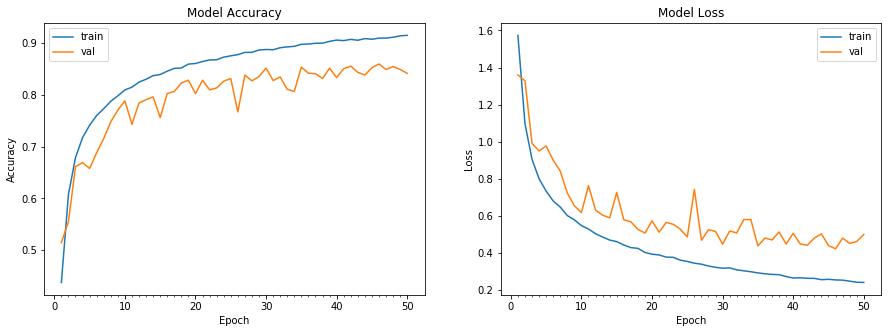

In [0]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy', custom_Loss])


start = time.time()

# Train the model
# argument 'steps_per_epoch' defines how many times train_iterator will be asked for batches of training data
# argument 'validation_steps' defines how many times test_iterator will be asked for batches of validation data
# here validation is being performed in batches instead of one shot to avoid using up too much memory while training
model_info = model.fit_generator(train_iterator, steps_per_epoch = (len(train_features)//BS), epochs = 50, 
                                 validation_data = test_iterator, validation_steps = (len(test_features)//BS),
                                   callbacks=[checkpoint],verbose=1)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))

# plot model history
plot_model_history(model_info)


In [0]:
# Load the best model weights
model.load_weights('/content/gdrive/My Drive/TSAI/Session6/Best-Model3.hdf5')

# Since we have trained our model on Normalized input images, we must normalize the test data before predicting test accuracy
test_iterator = datagenTest.flow(test_features, test_labels, batch_size = test_features.shape[0])

# Obtain a batch a normalized test data
batchX, batchY = test_iterator.next()

# compute test accuracy
print ("Best Accuracy on test data is: %0.2f"%accuracy(batchX, batchY, model))

Best Accuracy on test data is: 85.90
